In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing.data.txt", header=None, sep="\s+")
df.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

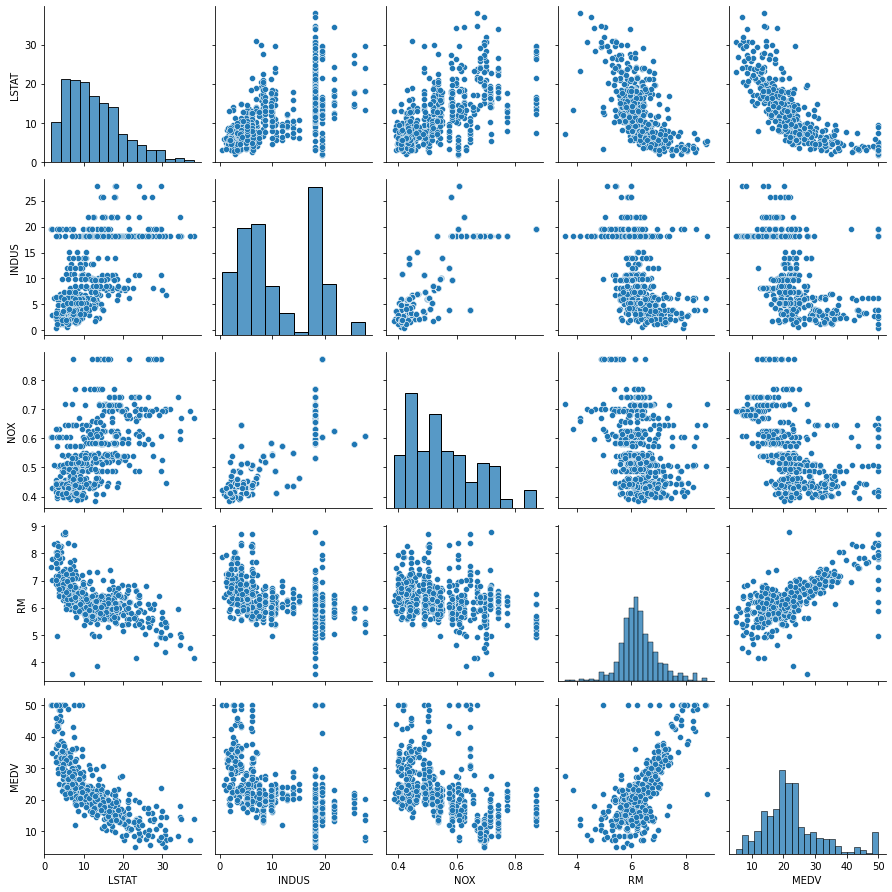

In [4]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

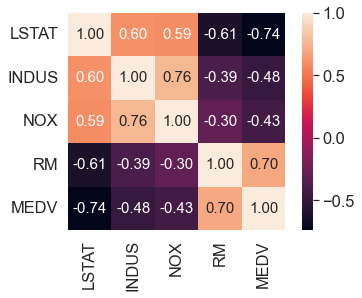

In [5]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 15},
    yticklabels=cols,
    xticklabels=cols,
)
plt.show()

In [6]:
class LinearRegressionGD:
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [7]:
X = df[["RM"]].values
y = df["MEDV"].values

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()


X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [9]:
numbers = np.array([1, 2, 3])
numbers[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [10]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

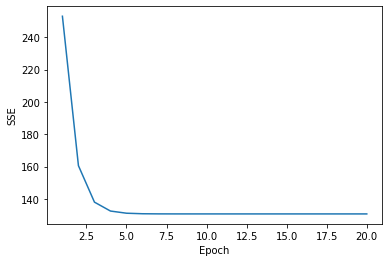

In [11]:
sns.reset_orig()  # Reset matplotlib style
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.show()

In [12]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c="steelblue", edgecolor="white", s=70)
    plt.plot(X, model.predict(X), color="black", lw=2)
    return None

Text(0, 0.5, 'Price in $1000s [MEDV] (standardized)')

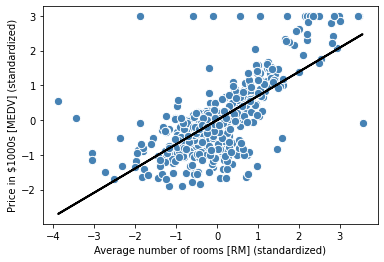

In [13]:
lin_regplot(X_std, y_std, lr)
plt.xlabel("Average number of rooms [RM] (standardized)")
plt.ylabel("Price in $1000s [MEDV] (standardized)")

In [14]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: {price:.3f}".format(price=sc_y.inverse_transform(price_std)[0]))

Price in $1000s: 10.840


In [15]:
print("Slope: {slope:.3f}".format(slope=lr.w_[1]))
print("Intercept: {intercept:.3f}".format(intercept=lr.w_[0]))

Slope: 0.695
Intercept: -0.000


In [16]:
## Estimating coefficient of regression model via scikit-learn

In [17]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
print("Slope: {0:.3f}".format(slr.coef_[0]))
print("Intercept: {0:.3f}".format(slr.intercept_))

Slope: 9.102
Intercept: -34.671


Text(0, 0.5, 'Price in $1000s [MEDV] (standardized)')

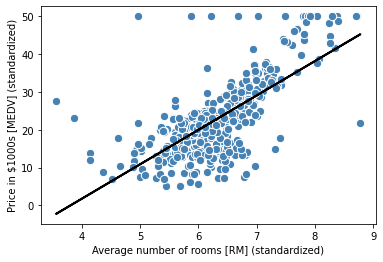

In [18]:
lin_regplot(X, y, slr)
plt.xlabel("Average number of rooms [RM] (standardized)")
plt.ylabel("Price in $1000s [MEDV] (standardized)")

In [19]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(
    LinearRegression(),
    max_trials=100,
    min_samples=50,
    loss="absolute_loss",
    residual_threshold=5.0,
    random_state=0,
)
ransac.fit(X, y)
ransac

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

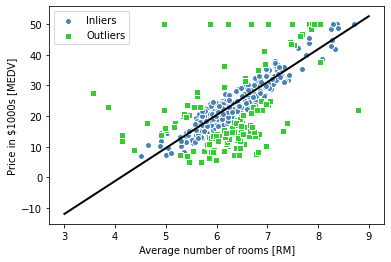

In [20]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(
    X[inlier_mask],
    y[inlier_mask],
    c="steelblue",
    edgecolors="white",
    marker="o",
    label="Inliers",
)
plt.scatter(
    X[outlier_mask],
    y[outlier_mask],
    c="limegreen",
    edgecolor="white",
    marker="s",
    label="Outliers",
)
plt.plot(line_X, line_y_ransac, color="black", lw=2)
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000s [MEDV]")
plt.legend(loc="upper left")
plt.show()

In [21]:
# Is this performing better than LinearRegression?
print("Slope: {0:.3f}".format(ransac.estimator_.coef_[0]))
print("Intercept: {0:.3f}".format(ransac.estimator_.intercept_))

Slope: 10.735
Intercept: -44.089


In [22]:
# Evaluating the performance of linear regression models

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

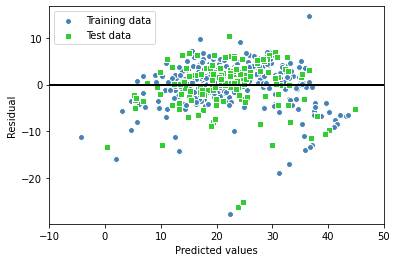

In [23]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c="steelblue",
    marker="o",
    edgecolor="white",
    label="Training data",
)
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="limegreen",
    marker="s",
    edgecolor="white",
    label="Test data",
)
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
plt.xlim([-10, 50])
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

print(
    "MSE train: {0:.3f}, test: {1:.3f}".format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred),
    )
)

MSE train: 19.958, test: 27.196


In [25]:
from sklearn.metrics import r2_score

print(
    "R^2 train: {0:.3f}, test: {1:.3f}".format(
        r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
    )
)

R^2 train: 0.765, test: 0.673


In [26]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Add a second degree polynomial term.
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[
    :, np.newaxis
]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# Fit a simple linear regression model for comparison
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

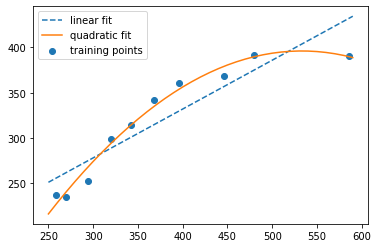

In [28]:
# Fit a multiple regression model on the transformed features for polynomial regression.
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# Plot the results.
plt.scatter(X, y, label="training points")
plt.plot(X_fit, y_lin_fit, label="linear fit", linestyle="--")
plt.plot(X_fit, y_quad_fit, label="quadratic fit")
plt.legend(loc="upper left")
plt.show()

In [29]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print(
    "Training MSE linear: {lin:.3f}, quadratic: {qua:.3f}".format(
        lin=mean_squared_error(y, y_lin_pred), qua=mean_squared_error(y, y_quad_pred)
    )
)

print(
    "Training R^2 linear: {lin:.3f}, quadratic: {qua:.3f}".format(
        lin=r2_score(y, y_lin_pred), qua=r2_score(y, y_quad_pred)
    )
)

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


In [30]:
# Modelling non-linear relationship in the Housing dataset

X = df[["LSTAT"]].values
y = df["MEDV"].values

In [31]:
regr = LinearRegression()

# Create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [32]:
# Fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [33]:
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [34]:
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

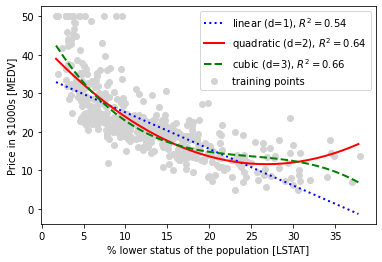

In [35]:
# Plot features

plt.scatter(X, y, label="training points", color="lightgray")
plt.plot(
    X_fit,
    y_lin_fit,
    label="linear (d=1), $R^2={r2:.2f}$".format(r2=linear_r2),
    color="blue",
    lw=2,
    linestyle=":",
)
plt.plot(
    X_fit,
    y_quad_fit,
    label="quadratic (d=2), $R^2={r2:.2f}$".format(r2=quadratic_r2),
    color="red",
    lw=2,
    linestyle="-",
)

plt.plot(
    X_fit,
    y_cubic_fit,
    label="cubic (d=3), $R^2={r2:.2f}$".format(r2=cubic_r2),
    color="green",
    lw=2,
    linestyle="--",
)
plt.xlabel("% lower status of the population [LSTAT]")
plt.ylabel("Price in $1000s [MEDV]")
plt.legend(loc="upper right")
plt.show()

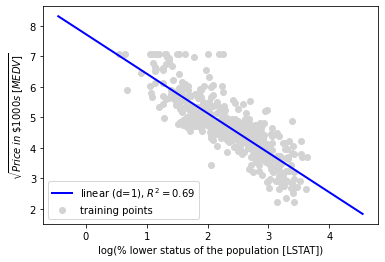

In [36]:
# Transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# Fit features.
X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# Plot results.
plt.scatter(X_log, y_sqrt, label="training points", color="lightgray")
plt.plot(
    X_fit,
    y_lin_fit,
    label="linear (d=1), $R^2={lin:.2f}$".format(lin=linear_r2),
    color="blue",
    lw=2,
)
plt.xlabel("log(% lower status of the population [LSTAT])")
plt.ylabel("$\sqrt{Price \; in \; \$1000s \; [MEDV]}$")
plt.legend(loc="lower left")
plt.show()

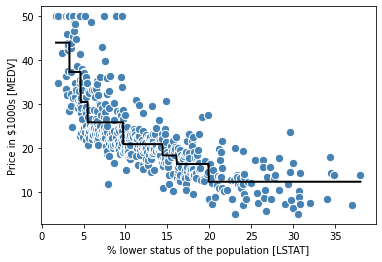

In [37]:
from sklearn.tree import DecisionTreeRegressor

X = df[["LSTAT"]].values
y = df["MEDV"].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel("% lower status of the population [LSTAT]")
plt.ylabel("Price in $1000s [MEDV]")
plt.show()

In [38]:
# Random forest regression

X = df.iloc[:, :-1].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=1000, criterion="mse", random_state=1, n_jobs=-1
)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print(
    "MSE train: {train:.3f}, test: {test:.3f}".format(
        train=mean_squared_error(y_train, y_train_pred),
        test=mean_squared_error(y_test, y_test_pred),
    )
)

print(
    "R^2 train: {train:.3f}, test: {test:.3f}".format(
        train=r2_score(y_train, y_train_pred), test=r2_score(y_test, y_test_pred)
    )
)

MSE train: 1.644, test: 11.085
R^2 train: 0.979, test: 0.877


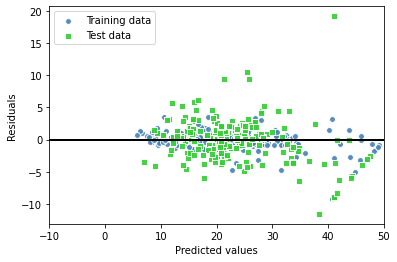

In [40]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c="steelblue",
    edgecolor="white",
    marker="o",
    s=35,
    alpha=0.9,
    label="Training data",
)
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="limegreen",
    edgecolor="white",
    marker="s",
    s=35,
    alpha=0.9,
    label="Test data",
)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="black")
plt.xlim([-10, 50])
plt.show()